In [1]:
import numpy as np
import cv2
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

# Model Loading

In [2]:
model=tf.keras.models.load_model("model_testing.h5")

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 64)        3

In [5]:
category=['angry','happy','sad','surprise','neutral']

# Code for generating result from video

In [46]:
#this code will generate results from video
vid=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(0)#here 0 means your first webcam on the system
#we can save our video using these methods
out=cv2.VideoWriter('test2.avi',cv2.VideoWriter_fourcc('M','J','P','G'),20.0,(640,480))

while True:
    r,frame=vid.read()
    frame=cv2.resize(frame,(640,450))
    img=cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
    
    face=face_cascade.detectMultiScale(img)
    
    for x,y,w,h in face:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
        
        img_final=img[y:y+h,x:x+w]
        
       
        img_final=cv2.resize(img_final,(48,48))#resize the image 
        
        img_final=img_final/255
        img_final=np.array(img_final).reshape(-1,48,48,1)
        #print(img_final)
        acc=model.predict(img_final)
        index = np.argmax(acc)
        name=category[index]
        print(name)
        
        
        cv2.putText(frame,name,(x,y),cv2.FONT_HERSHEY_SIMPLEX ,2,(255,0,0),2)
        out.write(frame)
    
        #cv2.imwrite('.\\testingimage\\{}.jpg'.format(iter1),img_final)
        #cv2.waitKey(100)
        
        #cv2.waitkey(1)
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
vid.release()
out.release()
cv2.destroyAllWindows()


angry
sad
happy
angry
angry
angry
angry
angry
angry
happy
angry
angry
angry
angry
angry
sad
sad
sad
sad
sad
sad
sad
sad
sad
angry
sad
neutral
angry
angry
neutral
happy
happy
angry
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
neutral
neutral
angry
surprise
angry
surprise
surprise
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
neutral
angry
angry
angry
angry
surprise
angry
angry
angry
angry
angry
angry
sad
angry
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
neutral
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
happy
happy
sad
sad
sad
sa

# Image Testing Code

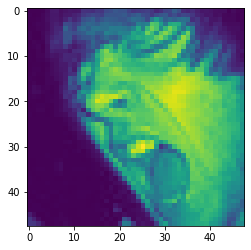

angry


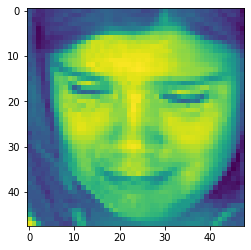

sad


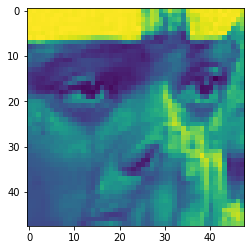

sad


In [32]:
import os
for name in os.listdir(r'E:\Python\KaggleFaceEmotion\face-expression-recognition-dataset\images\validation\sad')[:3]:
    img=cv2.imread(r"E:\Python\KaggleFaceEmotion\face-expression-recognition-dataset\images\validation\sad\{}".format(name),cv2.IMREAD_GRAYSCALE)
    final_img=cv2.resize(img,(48,48))
    plt.imshow(final_img)
    plt.show()
    img_final=np.array(final_img).reshape(-1,48,48,1)
    #print(img_final)
    acc=model.predict(img_final)
    index = np.argmax(acc)
    name=category[index]
    print(name)

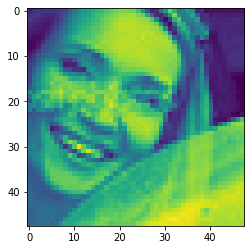

happy


In [45]:
for name in os.listdir(r'E:\Python\KaggleFaceEmotion\face-expression-recognition-dataset\images\validation\happy')[32:33]:
    img=cv2.imread(r"E:\Python\KaggleFaceEmotion\face-expression-recognition-dataset\images\validation\happy\{}".format(name),cv2.IMREAD_GRAYSCALE)
    final_img=cv2.resize(img,(48,48))
    plt.imshow(final_img)
    plt.show()
    img_final=np.array(final_img).reshape(-1,48,48,1)
    #print(img_final)
    acc=model.predict(img_final)
    index = np.argmax(acc)
    name=category[index]
    print(name)